In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
%matplotlib inline 

In [79]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(test.shape)
print(train.shape)

(5681, 11)
(8523, 12)


In [80]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [81]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [82]:
#cancat train and test sheet
train["source"]="train"
test["source"]="test"
data=pd.concat([train,test],ignore_index=True) #ignore_index used for club the data
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [83]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [84]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [85]:
#print unique value if null is there replace itbefore start model apply prepocess the data 
data["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [86]:
data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [87]:
data["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

In [88]:
# calc the outlet age
data["Outlet_Age"]=2023-data["Outlet_Establishment_Year"]
data["Outlet_Age"]
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36


In [89]:
data["Item_Fat_Content"].value_counts() # lf,reg

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [90]:
data["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [91]:
data["Outlet_Size"].mode()[0]

'Medium'

In [92]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])
data["Outlet_Size"]

0        Medium
1        Medium
2        Medium
3        Medium
4          High
          ...  
14199     Small
14200    Medium
14201    Medium
14202    Medium
14203    Medium
Name: Outlet_Size, Length: 14204, dtype: object

In [93]:
data["Item_Weight"].mode()
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mode())
data["Item_Weight"]

0         9.30
1         5.92
2        17.50
3        19.20
4         8.93
         ...  
14199    10.50
14200     7.60
14201    10.00
14202    15.30
14203     9.50
Name: Item_Weight, Length: 14204, dtype: float64

In [94]:
data["Item_Outlet_Sales"].mode()

0    958.752
dtype: float64

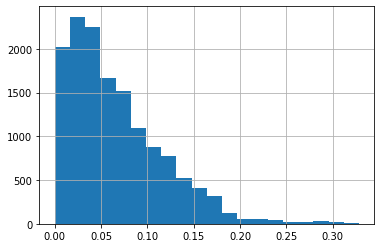

In [95]:
data["Item_Visibility"].hist(bins=20)

In [96]:
Q1= data["Item_Visibility"].quantile(0.25)

In [97]:
Q3=data["Item_Visibility"].quantile(0.75)

In [98]:
IQR=Q3-Q1
IQR

0.067001571

In [99]:
fill_data= data.query('(@Q1-1.5*@IQR)<=Item_Visibility<=(@Q3+1.5*@IQR)')

In [100]:
fill_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,36


In [101]:
fill_data.shape

(13943, 14)

In [102]:
data=fill_data

In [103]:
data.shape

(13943, 14)

In [161]:
data["Item_Visibility_bins"]=pd.cut(data["Item_Visibility"],[0.000,0.065,0.13,0.2],labels=['low viz','viz','high viz'])
data["Item_Visibility_bins"]

0         low viz
1         low viz
2         low viz
3             NaN
4             NaN
           ...   
14199     low viz
14200    high viz
14201         viz
14202         NaN
14203         viz
Name: Item_Visibility_bins, Length: 13943, dtype: category
Categories (3, object): [low viz < viz < high viz]

In [109]:
data["Item_Visibility_bins"].value_counts()

low viz     7363
viz         4283
high viz    1418
Name: Item_Visibility_bins, dtype: int64

In [106]:
#replace req oc
data["Item_Visibility_bins"].isnull().sum()

879

In [147]:
data["Item_Visibility_bins"].unique()

[low viz, NaN, viz, high viz]
Categories (3, object): [low viz < viz < high viz]

In [153]:
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan,,regex=True)
data["Item_Visibility_bins"].head()

0    low viz
1    low viz
2    low viz
3        NaN
4        NaN
Name: Item_Visibility_bins, dtype: category
Categories (3, object): [low viz < viz < high viz]

In [157]:
data["Item_Visibility_bins"].mode()[0]

'low viz'

In [162]:
import numpy as np
data["Item_Visibility_bins"] = data["Item_Visibility_bins"].replace(np.nan,"low viz")
data["Item_Visibility_bins"]

0         low viz
1         low viz
2         low viz
3             NaN
4             NaN
           ...   
14199     low viz
14200    high viz
14201         viz
14202         NaN
14203         viz
Name: Item_Visibility_bins, Length: 13943, dtype: category
Categories (3, object): [low viz < viz < high viz]

In [164]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2305
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5568
source                          0
Outlet_Age                      0
Item_Visibility_bins          879
dtype: int64

In [138]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(['low fat','LF','low Fat'],"Low Fat")

In [139]:
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(['reg','regular'],'Regular')


In [166]:
data["Item_Fat_Content"].unique()

array([0, 1])

In [165]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2305
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5568
source                          0
Outlet_Age                      0
Item_Visibility_bins          879
dtype: int64

In [141]:
le=LabelEncoder()

In [154]:
data["Item_Fat_Content"]=le.fit_transform(data["Item_Fat_Content"])

In [163]:
#data["Item_Visibility_bins"]=le.fit_transform(data["Item_Visibility_bins"])